# Minimum Working Example

In [1]:
# importing module
from analysis import PulseHeatPipe
# plotting
from analysis import DataVisualisation

In [2]:
# defining the reference variable
analysis = PulseHeatPipe("data/al2o3_diwater_exp/60_FR/")

Data loaded from directory: data/al2o3_diwater_exp/60_FR/


In [3]:
help(analysis)

Help on PulseHeatPipe in module analysis object:

class PulseHeatPipe(builtins.object)
 |  PulseHeatPipe(datapath: str)
 |  
 |  ## PulseHeatPipe - Manually defined functions for Advanced Data Analysis and Machine Learning.
 |  
 |  ## Useage: 
 |  ### imorting the module
 |  from analysis import PulsHeatPipe
 |  ### creating the reference variable 
 |  analysis = PulseHaatPipe("datapath")
 |  ### for a class help 
 |  help(analysis)
 |  ### for a function help
 |  help(analysis.data_etl)
 |  ### using a function from the class
 |  df, df_conv = analysis.data_etl
 |  
 |  ## list of avilable functions
 |  1. data_etl
 |  2. gibbs_fe
 |  3. data_chop
 |  4. data_stat
 |  5. data_property_avg
 |  6. best_TP
 |  7. plot_all_data
 |  8. plot_Te_Tc
 |  9. plot_eu
 |  
 |  Methods defined here:
 |  
 |  __init__(self, datapath: str)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  best_TP(self, data: pandas.core.frame.DataFrame)
 |      best_TP finds best G(T,P

In [4]:
help(analysis.data_etl)

Help on method data_etl in module analysis:

data_etl() method of analysis.PulseHeatPipe instance
    data_etl loads experimental data from all experimental data files (xlsx).
    Filters data and keeps only important columns.
    Combine selected data and save to csv file.
    Conver units to MKS [K, bar] system and save to csv file. 
    
    useage: analysis = PulseHeatPipe("path")
            df, df_conv = analysis.data_etl()



In [5]:
# data ETL
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/al2o3_diwater_exp/60_FR/'combined_converted_data.csv'


In [6]:
help(analysis.gibbs_fe)

Help on method gibbs_fe in module analysis:

gibbs_fe(data: pandas.core.frame.DataFrame) method of analysis.PulseHeatPipe instance
    gibbs_fe calculates the chagne in the gibbs free energy at a given vacuum pressure and temperature.
    dG = dG' + RTln(P/P')
    here, R = 8.314 [J/molK]
    P and P' = Pressure [bar]
    T = Temperature [K]
    
    useage: df_gfe = analysis.gibbs_fe(data)



In [7]:
# calculation of GFE
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/60_FR/'gfe_combined.csv


In [8]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,302.150000,301.90,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
1,0.5,302.950000,301.90,0.916667,0.379969,0.011458,-2437.287541,-2428.840101,-8.447440
2,1.0,304.150000,302.15,1.666667,0.379969,0.020833,-2446.941758,-2430.851396,-16.090362
3,1.5,305.750000,302.15,3.000000,0.379969,0.037500,-2459.814047,-2430.851396,-28.962651
4,2.0,307.150000,303.15,3.000000,0.379969,0.037500,-2471.077300,-2438.896577,-32.180723
...,...,...,...,...,...,...,...,...,...
442,48.0,367.150000,352.65,14.500000,1.152651,0.181250,433.650799,416.524457,17.126342
443,48.5,367.816667,352.40,15.416667,1.153985,0.192708,437.973264,419.616054,18.357210
444,49.0,367.816667,352.15,15.666667,1.155318,0.195833,441.504230,422.698939,18.805291
445,49.5,367.816667,352.15,15.666667,1.156651,0.195833,445.031123,426.075608,18.955515


In [9]:
# defining visual variable with sample name
visual = DataVisualisation('Al2O3_DI_60FR')

Data loaded from directory: Al2O3_DI_60FR


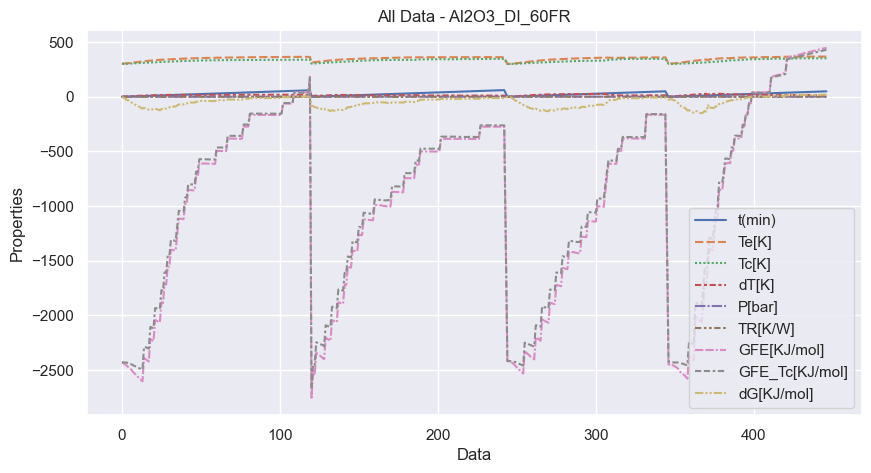

In [10]:
visual.plot_all_data(df_gfe)

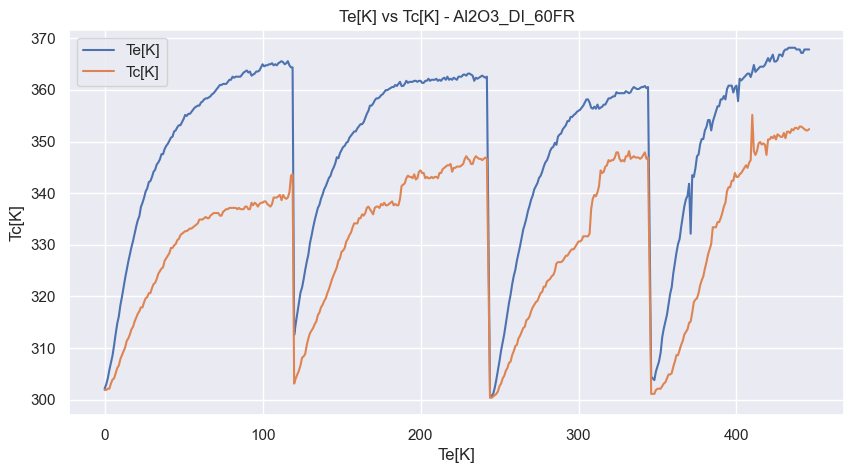

In [11]:
visual.plot_Te_Tc(df_gfe)

In [12]:
help(analysis.data_chop)

Help on method data_chop in module analysis:

data_chop(data: pandas.core.frame.DataFrame, Tmin=300, Tmax=400) method of analysis.PulseHeatPipe instance
    data_chop function is used to chop the data for the selected temperature value from the Te[K] column.
    
    useage: data = analysis.data_chop(df, Tmin, Tmax)
    here, Tmin/Tmax is a suitable value (int) from the data.
    default values: Tmin=300, Tmax=400



In [13]:
# data selection wrt Te
df_selected = analysis.data_chop(df_gfe)

Optimal range of temperature(Te) for data selection: [Tmin:300.55, Tmax:368]


In [14]:
help(analysis.data_stat)

Help on method data_stat in module analysis:

data_stat(data: pandas.core.frame.DataFrame) method of analysis.PulseHeatPipe instance
    data_stat sorts and arrange value by a group from the experimental data loaded with data_etl function, calculates mean and standard deviation of the grouped data.
    Calculated result will be stored at the location of data files.
    
    df_mean, df_std = analysis.data_stat(data)



In [15]:
# statistical calculations
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [16]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.550000,0.000000,300.400000,0.150000,0.379969,0.001875,-2417.979106,-2416.772329,-1.206777
1,300.750000,0.500000,300.400000,0.350000,0.379969,0.004375,-2419.588143,-2416.772329,-2.815813
2,301.150000,1.000000,300.650000,0.500000,0.379969,0.006250,-2422.806215,-2418.783625,-4.022590
3,302.150000,0.000000,301.900000,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
4,302.350000,1.500000,300.900000,1.450000,0.379969,0.018125,-2432.460432,-2420.794920,-11.665512
...,...,...,...,...,...,...,...,...,...
218,366.816667,40.000000,350.900000,15.916667,1.131320,0.198958,376.278813,359.954841,16.323972
219,367.150000,47.750000,352.775000,14.375000,1.151985,0.179688,431.884437,414.974292,16.910145
220,367.483333,42.000000,351.650000,15.833333,1.136653,0.197917,391.340825,374.479571,16.861254
221,367.816667,46.888889,352.177778,15.638889,1.149689,0.195486,426.513960,408.397183,18.116778


In [17]:
# calculating average values of thermal properties
analysis.data_property_avg(df_mean, df_std)

Tc  average:     324.7877 +- 2.0934 [K]
P   average:     0.6561 +- 0.0304 [bar]
dT  average:     15.7971 +- 2.5043 [K]
TR  average:     0.1975 +- 0.0313 [K/W]
GFE average:     -1323.5673 +- 118.0243 [KJ/mol]



In [18]:
# finding best (T,P)
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-151.5555]
Te optimal:        337.4833[K] 
P  optimal:        0.48[bar] 
dT optimal:        24.8333[K] 
TR optimal:        0.3104[K/W] 
GFE optimal:       dG(337.4833, 0.48) = -2059.6294 [KJ/mol]



In [19]:
help(visual.plot_eu)

Help on method plot_eu in module analysis:

plot_eu(df_mean: pandas.core.frame.DataFrame, df_std: pandas.core.frame.DataFrame, property: str, point='.k', eu='r') method of analysis.DataVisualisation instance
    Data Visualisation
    
    useage: visual.plot_eu(df_mean, df_std, property='Tc[K]', point='.k', eu='r')
            here, choose value from property list: ['Tc[K]', 'dT[K]', 'P[bar]', 'TR[K/W]', 'GFE[KJ/mol]', 'GFE_Tc[KJ/mol]', 'dG[KJ/mol]']



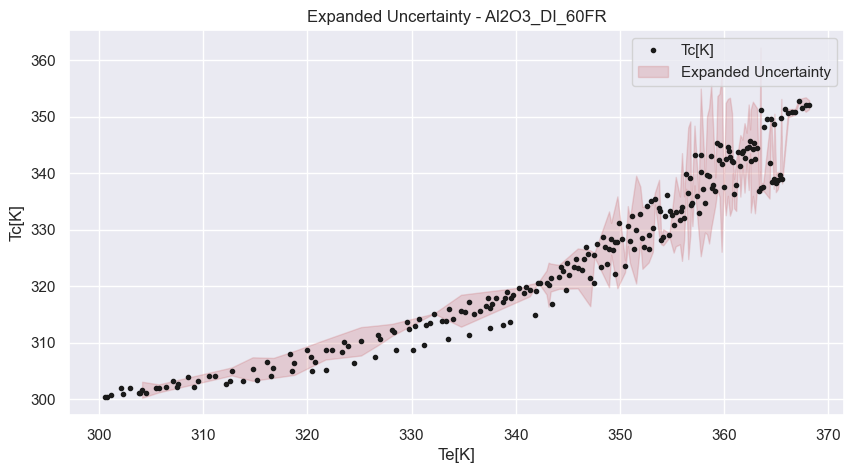

In [20]:
# data visualisation for analysed data
visual.plot_eu(df_mean, df_std, 'Tc[K]')

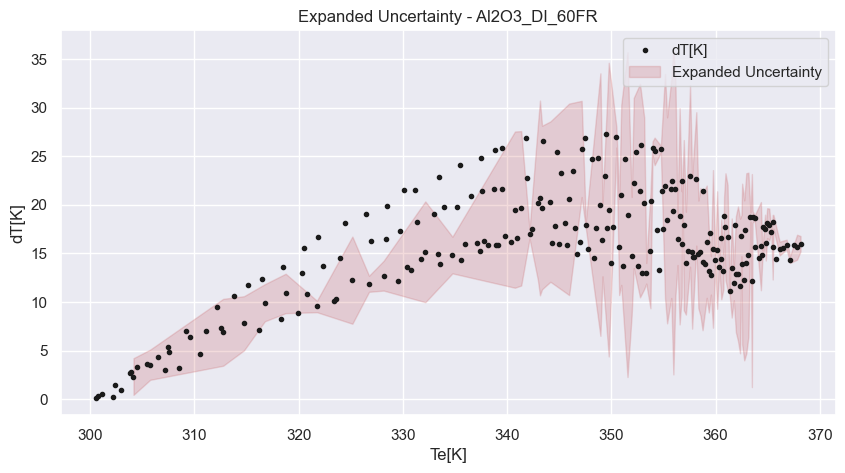

In [21]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

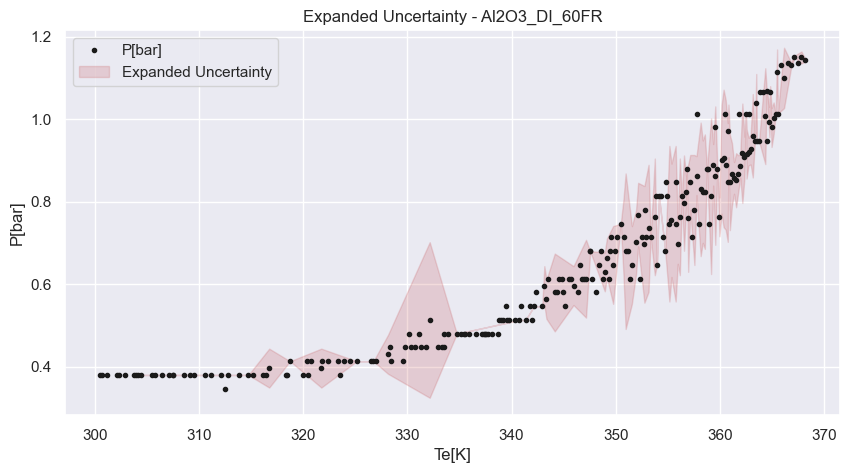

In [22]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

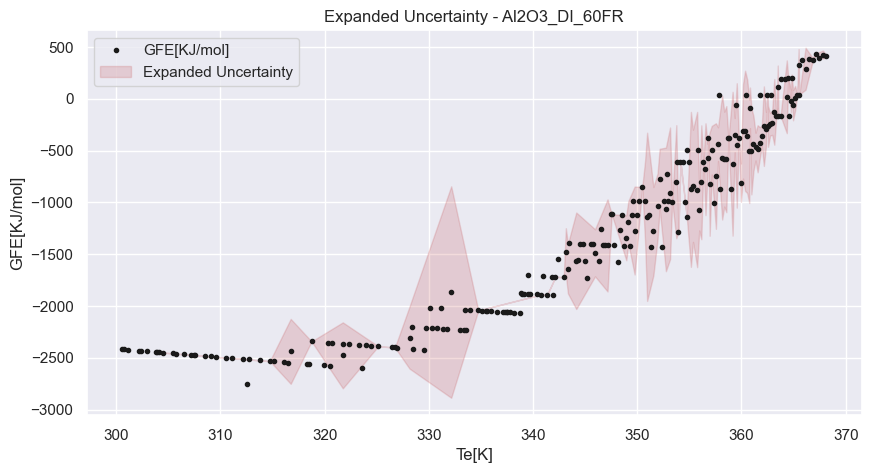

In [23]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

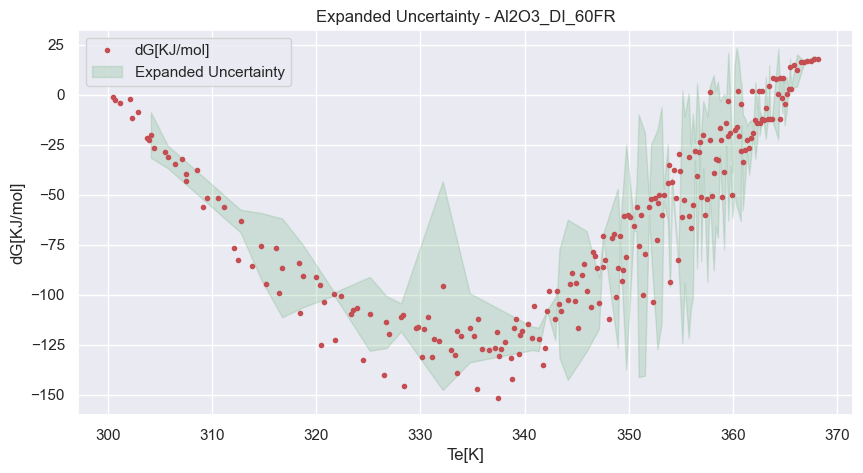

In [24]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')